<a href="https://colab.research.google.com/github/asadian98/Deep-Learning-Course-EE25647/blob/HW3%2FQ3%2FDone/HW3/HW3_Q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Download Data from Kaggle

In [1]:
from google.colab import drive
drive.mount('/content/drive')

%cd drive/MyDrive/

Mounted at /content/drive
/content/drive/MyDrive


In [216]:
! pip install -q kaggle

from google.colab import files
files.upload()

{}

In [217]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

! chmod 600 ~/.kaggle/kaggle.json

! kaggle datasets download -d adityajn105/flickr8k

!unzip \*.zip

mkdir: cannot create directory ‘/root/.kaggle’: File exists
flickr8k.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  trainingandtestdata.zip
replace testdata.manual.2009.06.14.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N

Archive:  flickr8k.zip


In [2]:
import glob
import numpy as np
import pandas as pd

img_files = glob.glob('Images/*.jpg',recursive=True)
print(f'Total images in archive : {len(img_files)}')

Total images in archive : 8091


In [3]:
cap_df = pd.read_csv('captions.txt')
print(f'Total Captions in file : {cap_df.shape[0]}')
cap_df.head()

Total Captions in file : 40455


,image,caption
0,1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set o...
1,1000268201_693b08cb0e.jpg,A girl going into a wooden building .
2,1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .
3,1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playh...
4,1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a woo...


In [4]:
from collections import defaultdict

image_path_to_caption = defaultdict(list)
for idx, row in cap_df.iterrows():
    caption = row.caption
    im_path = row['image'][:-4]
    image_path_to_caption[im_path].append(caption)
print(f"Total captions present in the dataset: {len(cap_df['caption'])}")
print(f"Total images present in the dataset: {len(img_files)}")

Total captions present in the dataset: 40455
Total images present in the dataset: 8091


In [5]:
image_path_to_caption['1000268201_693b08cb0e']

['A child in a pink dress is climbing up a set of stairs in an entry way .',
 'A girl going into a wooden building .',
 'A little girl climbing into a wooden playhouse .',
 'A little girl climbing the stairs to her playhouse .',
 'A little girl in a pink dress going into a wooden cabin .']

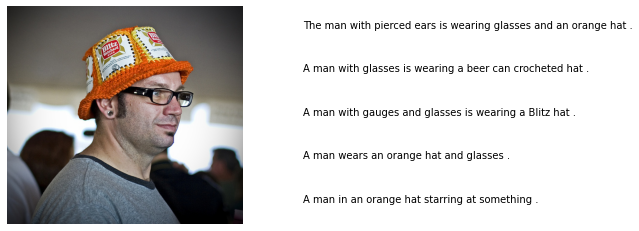

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import io

image_paths = list(image_path_to_caption.keys())
all_captions = []
img_name_vector = []
for image_path in image_paths:
    caption_list = image_path_to_caption[image_path]
    all_captions.extend(caption_list)
    img_name_vector.extend([image_path] * len(caption_list))

f, axes = plt.subplots(1, 2)
plt.axis('off')
f.set_figwidth(10)
image_num = 20
axes[0].imshow(io.imread('Images/' + img_name_vector[image_num] + '.jpg'))
axes[0].axis('off')
axes[1].set_ylim(0,5)
for i in range(image_num,image_num+5):
    axes[1].text(0,i+0.5-image_num,all_captions[i])

In [7]:
import string
import re

def preprocessing(my_dict):
    maxCapSize = 0
    for key, cap_list in my_dict.items():
        for i in range(len(cap_list)):
            cap = cap_list[i]
            cap = re.sub('[()!?]', ' ', cap)  # remove punctuations
            cap = re.sub('\[.*?\]',' ', cap)  # remove punctuations
            cap = re.sub("[^a-z0-9]"," ", cap)# non-alphanumeric characters
            cap = cap.split()
            cap = [word.lower() for word in cap]
            cap = [word for word in cap if len(word)>1]
            cap = [word for word in cap if word.isalpha()]
            cap_list[i] =  ' '.join(cap)
            if(maxCapSize < len(cap)):
              maxCapSize = len(cap)
              maxCapKey = key
    print('Max number of words in captions = ', maxCapSize)
    return maxCapKey, maxCapSize

maxCapKey, maxCapSize = preprocessing(image_path_to_caption)

Max number of words in captions =  32


In [8]:
image_path_to_caption[maxCapKey]

['man holding money standing in front of street band and store',
 'man holds dollar bill in front of his face while posing in front of street band',
 'man holds money in the air',
 'man in green jacket is standing outside store holding some money in front of his face',
 'frican merican man wearing green sweatshirt and blue vest is holding up dollar bills in front of his face while standing on busy sidewalk in front of group of men playing instruments']

In [9]:
image_path_to_caption['1000268201_693b08cb0e']

['child in pink dress is climbing up set of stairs in an entry way',
 'girl going into wooden building',
 'little girl climbing into wooden playhouse',
 'little girl climbing the stairs to her playhouse',
 'little girl in pink dress going into wooden cabin']

In [10]:
# save captions for cash problem
lines = list()
for key, cap_list in image_path_to_caption.items():
  for cap in cap_list:
    lines.append(key + ' ' + cap)
data = '\n'.join(lines)
file = open('clean_captions.txt', 'w')
file.write(data)
file.close()

Vocabulary Size =  1994


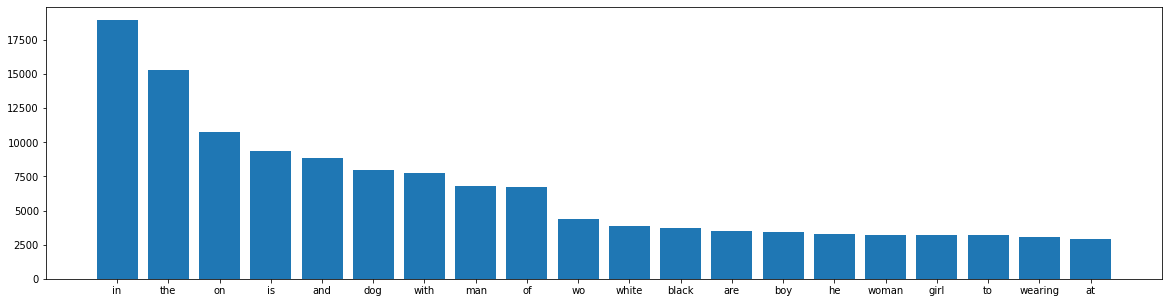

In [11]:
from collections import Counter

def to_vocabulary_save_cleaned_captions_and_plot(captions):
  cap_list = []
  for key in captions.keys():
    for j in range(5):
      cap_list.extend(captions[key][j].split())
  my_list = Counter(cap_list)
  vocab_list = [d for d in my_list.keys() if my_list[d] >= 10]
  
  vocabset = set(vocab_list)
  
  lines = list()
  for key in captions.keys():
    for j in range(5):
      cap_ls = captions[key][j].split()
      cap = ' '.join([word for word in cap_ls if (word in vocabset)])
      lines.append(key + ' ' + cap)
  data = '\n'.join(lines)
  file = open('clean_captions.txt', 'w')
  file.write(data)
  file.close()
  
  # Get top 20 words by frequency.
  vals = sorted(my_list.items(),key=lambda x:x[1],reverse=True)
  words = [x[0] for x in vals[:20]]
  cnts = [x[1] for x in vals[:20]]
  plt.figure(figsize=(20,5))
  f = plt.bar(words,cnts)

  return set(vocab_list)
 
# summarize vocabulary
vocabulary = to_vocabulary_save_cleaned_captions_and_plot(image_path_to_caption)
print('Vocabulary Size = ', len(vocabulary))

In [12]:
from pickle import load

def load_captions_cleaned(filename, dataset):
  file = open(filename, 'r')
  doc = file.read()
  file.close()
  captions = dict()
  for line in doc.split('\n'):
    tokens = line.split()
    id, cap = tokens[0], tokens[1:]
    if id in dataset:
      if id not in captions:
        captions[id] = list()
        newCap = '<START> ' + ' '.join(cap) + ' <END>'
        captions[id].append(newCap)
  return captions

# Load Train Data
filename = 'Flickr_8k.trainImages.txt'
file = open(filename, 'r')
doc = file.read()
file.close()
dataset = list()
for line in doc.split('\n'):
  # one line has len < 1
  if len(line) < 1:
    continue
  identifier = line.split('.')[0]
  dataset.append(identifier)
train = set(dataset)
print('Train Data Size =', len(train))
train_captions = load_captions_cleaned('clean_captions.txt', train)
print('Cleaned Captions Size=', len(train_captions))
print(train_captions['1000268201_693b08cb0e'])

Train Data Size = 6000
Cleaned Captions Size= 6000
['<START> child in pink dress is climbing up set of stairs in an way <END>']


In [17]:
from os import listdir
from keras.models import Model
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing.image import load_img, img_to_array
from pickle import dump
 
def encode(directory):
  model = VGG16()
  model = Model(inputs=model.inputs, outputs=model.layers[-2].output)
  print(model.summary())
  features = dict()
  i = 0
  j = 0
  for name in listdir(directory):
    filename = directory + '/' + name
    image = load_img(filename, target_size=(224, 224))
    image = img_to_array(image)
    dx, dy, dz = image.shape
    image = image.reshape((1, dx, dy, dz))
    image = preprocess_input(image)
    feature = model.predict(image, verbose=0)
    id = name.split('.')[0]
    features[id] = feature
    i = i + 1
    if(i > 100):
      j = j + 1
      i = 0
      print('{}%'.format(j), end=' ')
  return features
 
# extract features from all images
directory = 'Images'
features = encode(directory)
print('Number of Image = ', len(features))
# save 
dump(features, open('features.pkl', 'wb'))

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [13]:
# Load Validation Data
filename = 'Flickr_8k.devImages.txt'
file = open(filename, 'r')
doc = file.read()
file.close()
dataset = list()
for line in doc.split('\n'):
  # one line has len < 1
  if len(line) < 1:
    continue
  identifier = line.split('.')[0]
  dataset.append(identifier)
validation = set(dataset)
print('Validation Data Size =', len(validation))
validation_captions = load_captions_cleaned('clean_captions.txt', validation)
print('Validation Cleaned Captions Size=', len(validation_captions))

Validation Data Size = 1000
Validation Cleaned Captions Size= 1000


In [14]:
# Load Test Data
filename = 'Flickr_8k.testImages.txt'
file = open(filename, 'r')
doc = file.read()
file.close()
dataset = list()
for line in doc.split('\n'):
  # one line has len < 1
  if len(line) < 1:
    continue
  identifier = line.split('.')[0]
  dataset.append(identifier)
test = set(dataset)
print('Test Data Size =', len(test))
test_captions = load_captions_cleaned('clean_captions.txt', test)
print('Test Cleaned Captions Size=', len(test_captions))

Test Data Size = 1000
Test Cleaned Captions Size= 1000


In [17]:
import tensorflow as tf
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

idx2word = {}
word2idx = {}
i = 1
for w in vocabulary:
    word2idx[w] = i
    idx2word[i] = w
    i += 1

word2idx['<PAD>'] = 0
idx2word[0] = '<PAD>'
vocab_size = len(vocabulary) + 1

def to_lines(descriptions):
    all_desc = list()
    for key in descriptions.keys():
        [all_desc.append(d) for d in descriptions[key]]
    return all_desc

def data_generator(captions, Images, word2idx, maxCapSize, num_photos_per_batch):
    X1, X2, y = list(), list(), list()
    n=0
    while 1:
        for key, desc_list in captions.items():
            n+=1
            Image = np.reshape(Images[key], (len(Images[key][0]), ))
            for desc in desc_list:
                seq = [word2idx[word] for word in desc.split(' ') if word in word2idx]
                for i in range(1, len(seq)):
                    in_seq, out_seq = seq[:i], seq[i]
                    in_seq = pad_sequences([in_seq], maxlen=maxCapSize)[0]
                    out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]
                    X1.append(Image)
                    X2.append(in_seq)
                    y.append(out_seq)
            if n==num_photos_per_batch:
                yield [[np.array(X1), np.array(X2)], np.array(y)]
                X1, X2, y = list(), list(), list()
                n=0

In [18]:
num_photos_per_batch = 10

all_features = load(open('features.pkl', 'rb'))
train_features = {k: all_features[k] for k in train}

batch_generator = data_generator(captions=train_captions,
                                 Images=train_features,
                                 word2idx=word2idx,
                                 maxCapSize=maxCapSize, 
                                 num_photos_per_batch=num_photos_per_batch)

inputs, outputs = next(batch_generator)

In [ ]:
import numpy as np

embeddings_index = {}
f = open('glove.42B.300d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Found %s word vectors.' %len(embeddings_index))

In [ ]:
embedding_matrix = np.zeros((vocab_size, 300))
for word, i in word2idx.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
        
print(embedding_matrix.shape)

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_16 (InputLayer)          [(None, 30)]         0           []                               
                                                                                                  
 input_15 (InputLayer)          [(None, 4096)]       0           []                               
                                                                                                  
 embedding_1 (Embedding)        (None, 30, 300)      598500      ['input_16[0][0]']               
                                                                                                  
 dropout_3 (Dropout)            (None, 4096)         0           ['input_15[0][0]']               
                                                                                            

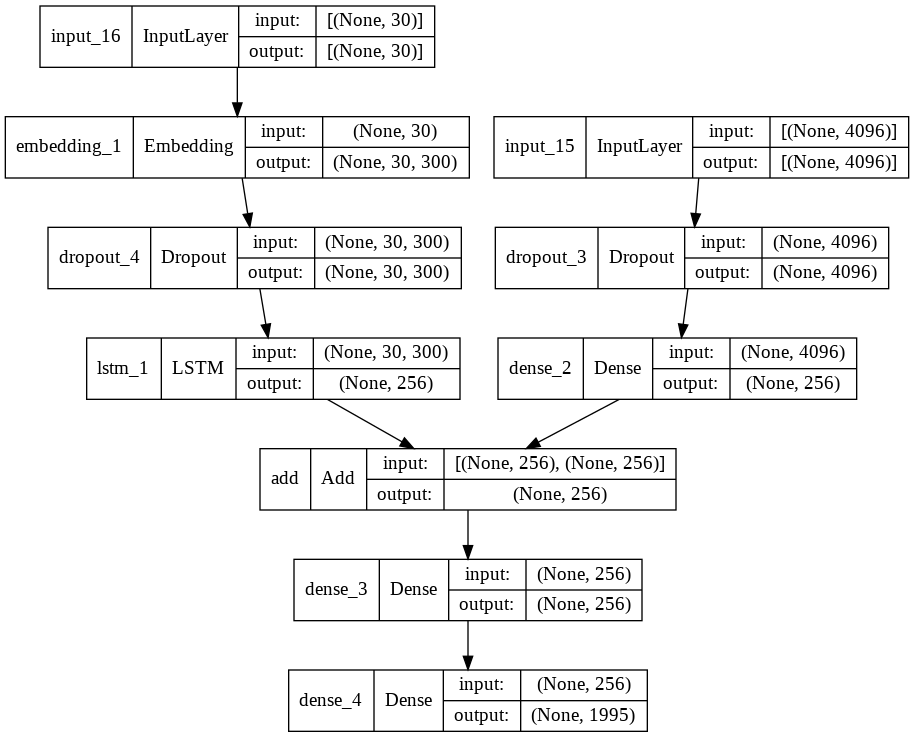

In [286]:
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import LSTM, Dense, Input, Dropout
from keras.layers.merge import add

inputs1 = Input(shape=(4096,))
fe1 = Dropout(0.5)(inputs1)
fe2 = Dense(256, activation='relu')(fe1)

inputs2 = Input(shape=(maxCapSize,))
se1 = tf.keras.layers.Embedding(vocab_size, 300, mask_zero=True)(inputs2)
se2 = Dropout(0.5)(se1)
se3 = LSTM(256)(se2)

decoder1 = add([fe2, se3])
decoder2 = Dense(256, activation='relu')(decoder1)
outputs = Dense(vocab_size, activation='softmax')(decoder2)
model = Model(inputs=[inputs1, inputs2], outputs=outputs)
model.compile(loss='categorical_crossentropy', optimizer='adam')

print(model.summary())
plot_model(model, to_file='model.png', show_shapes=True)

Training

In [ ]:
def LossAccPlot(history):
  plt.figure()
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='upper right')
  plt.show()

  plt.figure()
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='upper left')
  plt.show()


In [ ]:
epochs = 20
valid_accuracy = []
for i in range(epochs):
  print("run epoch ", ep)
	batch_generator = data_generator(captions=train_captions,
                                 photos=train_features,
                                 word2idx=word2idx,
                                 maxCapSize=maxCapSize, 
                                 num_photos_per_batch=num_photos_per_batch)
 
 

	history = model.fit_generator(batch_generator,
                     validation_data=validation_generator,
                     epochs=1,
                     steps_per_epoch=len(train_features),
                     verbose=1)
  LossAccPlot(history)
  valid_accuracy.append(max(history.history['val_accuracy']))
	model.save('model_' + str(i) + '.h5')
print(np.argmax(valid_accuracy), max(valid_accuracy))

Test

In [294]:
def test_model(Image, model, max_length, word2idx, idx2word):
    caption = ['<START>']
    for s in range(max_length):
        seq = [word2idx[i] for i in caption]
        seq = pad_sequences([seq], maxlen=max_length)[0]
        in_put = [np.array([Image]), np.array([seq])]
        word = model.predict(in_put, verbose=0)
        word = np.argmax(word)
        word = idx2word[word]
        if word is None:
            break
        caption.append(word)
        if word == '<END>':
            break
    return caption

In [293]:
from keras.models import load_model

loaded_model = load_model('model-ep002-loss3.245-val_loss3.612.h5')
photo = extract_features('example.jpg')
caption = test_model(Image = ,
                     model = loaded_model,
                     max_length = maxCapSize,
                     word2idx = word2idx,
                     idx2word = idx2word)

In [296]:
# '1107246521_d16a476380': ['<START> black dog jumping to catch rope toy <END>'],
test_captions['1107246521_d16a476380']

['<START> black dog jumping to catch rope toy <END>']

Text(0, 2, 'Caption Predicted: ')

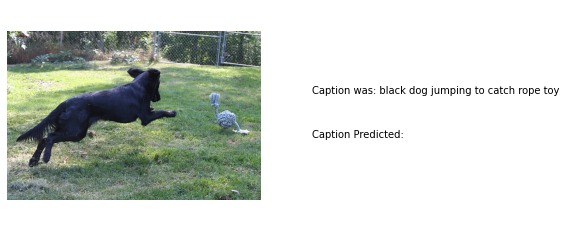

In [325]:
f, axes = plt.subplots(1, 2)
plt.axis('off')
f.set_figwidth(10)
image_num = 20
axes[0].imshow(io.imread('Images/' + '1107246521_d16a476380' + '.jpg'))
axes[0].axis('off')
axes[1].set_ylim(0,5)
axes[1].text(0,3,'Caption was: ' + ''.join(test_captions['1107246521_d16a476380'][0][8:-5]))
axes[1].text(0,2,'Caption Predicted: ' + ''.join(caption[0][8:-5]))